In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import pandas.tseries
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import itertools
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('zillow_data.csv')

In [2]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [3]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate('mean')

In [4]:
final_cities = ['Aurora','Greeley','Lakewood','Fort Worth','Everett','Seattle','Lehigh Acres','Sky Lake']

In [5]:
zips = df.loc[df['City'].isin(final_cities)].drop(columns=['RegionID','City', 'CountyName', 'Metro', 'State','SizeRank'],
                                           axis=1).groupby('RegionName').mean()
zips = pd.DataFrame(zips.reset_index())
zip_columns = list(zips.T.iloc[0])
zips = zips.T
zips.columns = zip_columns
zips = zips[1:]
zips = zips.set_index(pd.to_datetime(zips.index))
zips = zips.applymap(lambda x: round(np.float(x),2))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


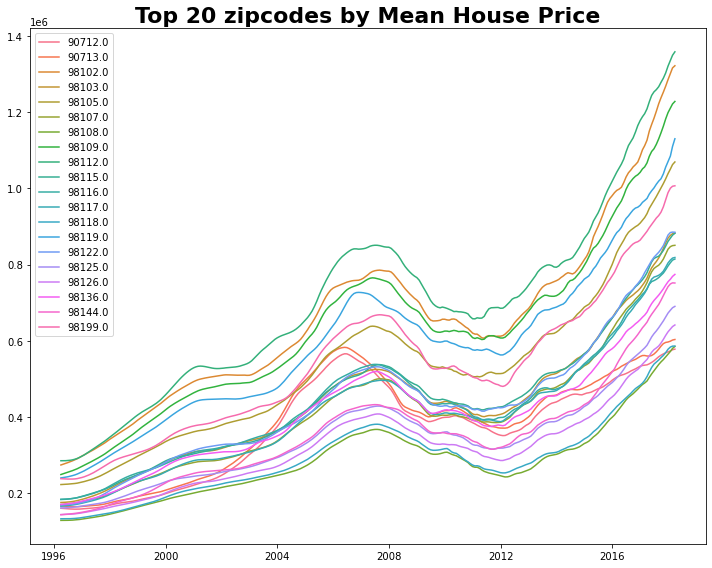

In [6]:
top20zips = list(zips.iloc[-1,:].sort_values(ascending=False).head(20).index)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
rcParams['figure.figsize'] = 10,8
sns.lineplot(data=zips[top20zips],dashes=False)
plt.title('Top 20 zipcodes by Mean House Price',font=font)
plt.tight_layout()

In [7]:
zip_dfs = []
for x in zip_list:
    x = pd.DataFrame(data = zips[x])
    zip_dfs.append(x)

NameError: name 'zip_list' is not defined

In [ ]:
for zip_df in zip_dfs:
    zip_df['ROI_MoM'] = np.zeros((265))
    zip_df['ROI_YoY'] = np.zeros((265))
    for x in range(0,265):    
        if x + 1 <265:
            zip_df.iloc[x+1,1] = round((zip_df.iloc[x+1,0] - zip_df.iloc[x,0])/zip_df.iloc[x,0],4)
        else: break
    for x in range(0,265):    
        if x + 12 <265:
            zip_df.iloc[x+12,2] = round((zip_df.iloc[x+12,0] - zip_df.iloc[x,0])/zip_df.iloc[x,0],4)
        else: break
    zip_df['EMA_6MO_roi_mo'] = zip_df.ROI_MoM.ewm(span=6,adjust=False).mean()
    zip_df['EMA_6MO_std_mo'] = zip_df.ROI_MoM.ewm(span=6,adjust=False).std()
    zip_df['EMA_6MO_roi_y'] = zip_df.ROI_YoY.ewm(span=6,adjust=False).mean()
    zip_df['EMA_6MO_std_y'] = zip_df.ROI_YoY.ewm(span=6,adjust=False).std()
    zip_df['rfr'] = rfr.DGS10
    zip_df['sharpe_ratio_monthly'] = (zip_df['EMA_6MO_roi_mo'] - (zip_df.rfr/12))/zip_df['EMA_6MO_std_mo']
    zip_df['sharpe_ratio_annual'] = (zip_df['EMA_6MO_roi_y'] - (zip_df.rfr))/zip_df['EMA_6MO_std_y']

In [9]:
topzips = [32809,98203,98108,80215,80631,76131]

In [10]:
df.loc[df['RegionName'].isin(topzips)]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1235,93487,80631,Greeley,CO,Greeley,Weld,1236,86500.0,87000.0,87500.0,...,207300,209500,211500,213300,215400,217700,220400,223600,226900,228600
2422,99626,98203,Everett,WA,Seattle,Snohomish,2423,136800.0,136500.0,136300.0,...,362100,365400,368700,372200,375400,380100,384300,388900,395700,401300
2689,91274,76131,Fort Worth,TX,Dallas-Fort Worth,Tarrant,2690,117400.0,117300.0,117300.0,...,189400,190800,191700,193000,194300,195800,197100,198700,200600,201900
4734,72235,32809,Sky Lake,FL,Orlando,Orange,4735,71700.0,71700.0,71800.0,...,159200,161300,163200,165100,167800,171400,174800,177800,180900,183400
4967,93291,80215,Lakewood,CO,Denver,Jefferson,4968,152000.0,152700.0,153600.0,...,448100,450800,454100,457900,460400,463700,467300,471400,476200,479000
5436,99568,98108,Seattle,WA,Seattle,King,5437,128700.0,128700.0,128800.0,...,521000,529200,537700,544500,550600,557400,564800,572000,580000,584900


In [11]:
final_zips = df.loc[df['RegionName'].isin(topzips)].drop(columns=['RegionID','City', 'CountyName', 'Metro', 'State','SizeRank'],
                                           axis=1).groupby('RegionName').mean()

In [12]:
final_zips

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionName,,,,,,,,,,,,,,,,,,,,,
32809,71700.0,71700.0,71800.0,71800.0,71800.0,71800.0,71900.0,72100.0,72300.0,72500.0,...,159200,161300,163200,165100,167800,171400,174800,177800,180900,183400
76131,117400.0,117300.0,117300.0,117300.0,117600.0,117900.0,118200.0,118600.0,119000.0,119400.0,...,189400,190800,191700,193000,194300,195800,197100,198700,200600,201900
80215,152000.0,152700.0,153600.0,154400.0,155300.0,156200.0,157100.0,158000.0,159000.0,160000.0,...,448100,450800,454100,457900,460400,463700,467300,471400,476200,479000
80631,86500.0,87000.0,87500.0,87900.0,88400.0,88900.0,89300.0,89700.0,90100.0,90500.0,...,207300,209500,211500,213300,215400,217700,220400,223600,226900,228600
98108,128700.0,128700.0,128800.0,128900.0,129100.0,129400.0,129900.0,130400.0,131100.0,132000.0,...,521000,529200,537700,544500,550600,557400,564800,572000,580000,584900
98203,136800.0,136500.0,136300.0,136300.0,136300.0,136500.0,136800.0,137300.0,137900.0,138600.0,...,362100,365400,368700,372200,375400,380100,384300,388900,395700,401300


In [13]:
relevant_zips = df.loc[df['RegionName'].isin(topzips)]
relevant_zips

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1235,93487,80631,Greeley,CO,Greeley,Weld,1236,86500.0,87000.0,87500.0,...,207300,209500,211500,213300,215400,217700,220400,223600,226900,228600
2422,99626,98203,Everett,WA,Seattle,Snohomish,2423,136800.0,136500.0,136300.0,...,362100,365400,368700,372200,375400,380100,384300,388900,395700,401300
2689,91274,76131,Fort Worth,TX,Dallas-Fort Worth,Tarrant,2690,117400.0,117300.0,117300.0,...,189400,190800,191700,193000,194300,195800,197100,198700,200600,201900
4734,72235,32809,Sky Lake,FL,Orlando,Orange,4735,71700.0,71700.0,71800.0,...,159200,161300,163200,165100,167800,171400,174800,177800,180900,183400
4967,93291,80215,Lakewood,CO,Denver,Jefferson,4968,152000.0,152700.0,153600.0,...,448100,450800,454100,457900,460400,463700,467300,471400,476200,479000
5436,99568,98108,Seattle,WA,Seattle,King,5437,128700.0,128700.0,128800.0,...,521000,529200,537700,544500,550600,557400,564800,572000,580000,584900


In [14]:
zip_df = pd.melt(relevant_zips, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')


In [15]:
zip_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,time,value
0,93487,80631,Greeley,CO,Greeley,Weld,1236,1996-04,86500.0
1,99626,98203,Everett,WA,Seattle,Snohomish,2423,1996-04,136800.0
2,91274,76131,Fort Worth,TX,Dallas-Fort Worth,Tarrant,2690,1996-04,117400.0
3,72235,32809,Sky Lake,FL,Orlando,Orange,4735,1996-04,71700.0
4,93291,80215,Lakewood,CO,Denver,Jefferson,4968,1996-04,152000.0
...,...,...,...,...,...,...,...,...,...
1585,99626,98203,Everett,WA,Seattle,Snohomish,2423,2018-04,401300.0
1586,91274,76131,Fort Worth,TX,Dallas-Fort Worth,Tarrant,2690,2018-04,201900.0
1587,72235,32809,Sky Lake,FL,Orlando,Orange,4735,2018-04,183400.0
1588,93291,80215,Lakewood,CO,Denver,Jefferson,4968,2018-04,479000.0


In [16]:
df.loc[df['RegionName'].isin(topzips)]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1235,93487,80631,Greeley,CO,Greeley,Weld,1236,86500.0,87000.0,87500.0,...,207300,209500,211500,213300,215400,217700,220400,223600,226900,228600
2422,99626,98203,Everett,WA,Seattle,Snohomish,2423,136800.0,136500.0,136300.0,...,362100,365400,368700,372200,375400,380100,384300,388900,395700,401300
2689,91274,76131,Fort Worth,TX,Dallas-Fort Worth,Tarrant,2690,117400.0,117300.0,117300.0,...,189400,190800,191700,193000,194300,195800,197100,198700,200600,201900
4734,72235,32809,Sky Lake,FL,Orlando,Orange,4735,71700.0,71700.0,71800.0,...,159200,161300,163200,165100,167800,171400,174800,177800,180900,183400
4967,93291,80215,Lakewood,CO,Denver,Jefferson,4968,152000.0,152700.0,153600.0,...,448100,450800,454100,457900,460400,463700,467300,471400,476200,479000
5436,99568,98108,Seattle,WA,Seattle,King,5437,128700.0,128700.0,128800.0,...,521000,529200,537700,544500,550600,557400,564800,572000,580000,584900


In [116]:
final_zips = df.loc[df['RegionName'].isin(topzips)].drop(columns=['RegionID','City', 'CountyName', 'Metro', 'State','SizeRank'],
                                           axis=1).groupby('RegionName').mean()
final_zips = pd.DataFrame(final_zips.reset_index())
columns = list(final_zips.T.iloc[0])
final_zips = final_zips.T
final_zips.columns = columns
final_zips.columns = final_zips.columns.astype(np.int).astype('str')
final_zips = final_zips[1:]
final_zips = final_zips.set_index(pd.to_datetime(final_zips.index))
final_zips = final_zips.applymap(lambda x: round(np.float(x),2))
final_zips

,32809,76131,80215,80631,98108,98203
1996-04-01,71700.0,117400.0,152000.0,86500.0,128700.0,136800.0
1996-05-01,71700.0,117300.0,152700.0,87000.0,128700.0,136500.0
1996-06-01,71800.0,117300.0,153600.0,87500.0,128800.0,136300.0
1996-07-01,71800.0,117300.0,154400.0,87900.0,128900.0,136300.0
1996-08-01,71800.0,117600.0,155300.0,88400.0,129100.0,136300.0
...,...,...,...,...,...,...
2017-12-01,171400.0,195800.0,463700.0,217700.0,557400.0,380100.0
2018-01-01,174800.0,197100.0,467300.0,220400.0,564800.0,384300.0
2018-02-01,177800.0,198700.0,471400.0,223600.0,572000.0,388900.0
2018-03-01,180900.0,200600.0,476200.0,226900.0,580000.0,395700.0


In [18]:
final_zips.columns

Int64Index([32809, 76131, 80215, 80631, 98108, 98203], dtype='int64')

In [19]:
final_zips

,32809,76131,80215,80631,98108,98203
1996-04-01,71700.0,117400.0,152000.0,86500.0,128700.0,136800.0
1996-05-01,71700.0,117300.0,152700.0,87000.0,128700.0,136500.0
1996-06-01,71800.0,117300.0,153600.0,87500.0,128800.0,136300.0
1996-07-01,71800.0,117300.0,154400.0,87900.0,128900.0,136300.0
1996-08-01,71800.0,117600.0,155300.0,88400.0,129100.0,136300.0
...,...,...,...,...,...,...
2017-12-01,171400.0,195800.0,463700.0,217700.0,557400.0,380100.0
2018-01-01,174800.0,197100.0,467300.0,220400.0,564800.0,384300.0
2018-02-01,177800.0,198700.0,471400.0,223600.0,572000.0,388900.0
2018-03-01,180900.0,200600.0,476200.0,226900.0,580000.0,395700.0


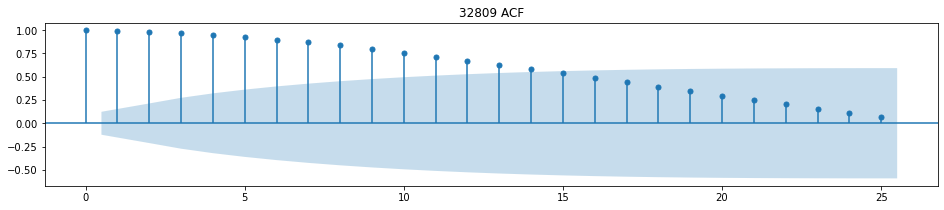

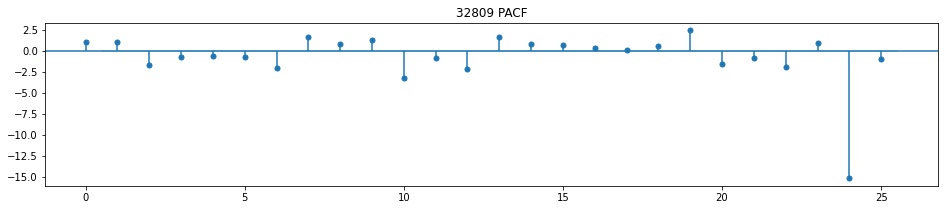

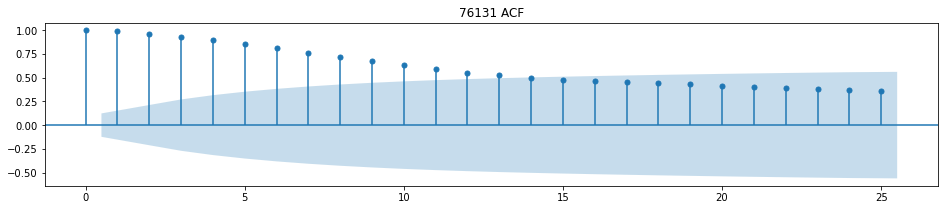

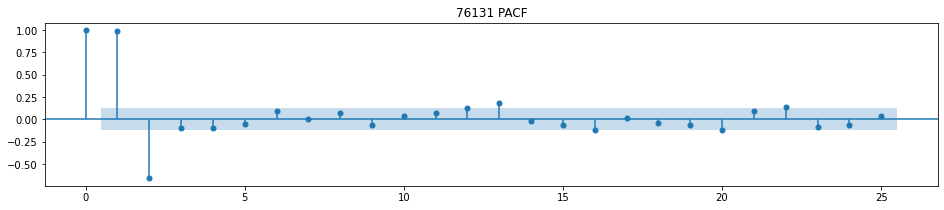

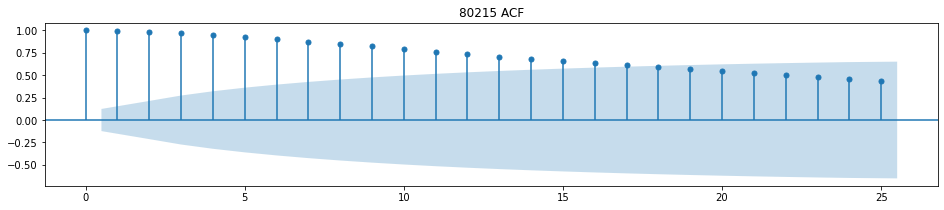

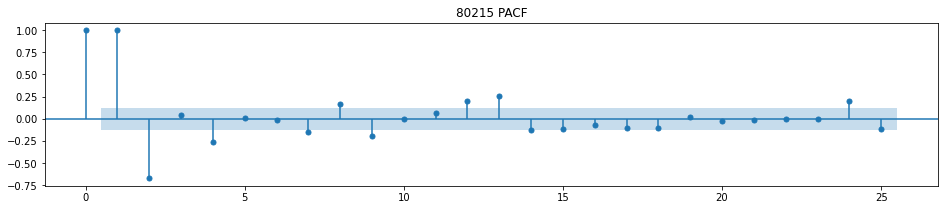

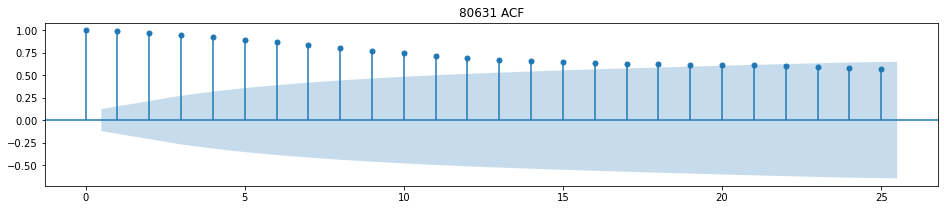

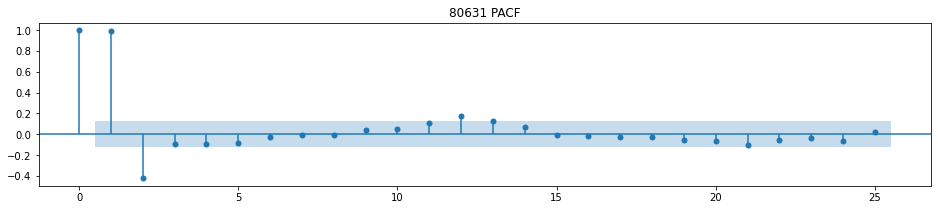

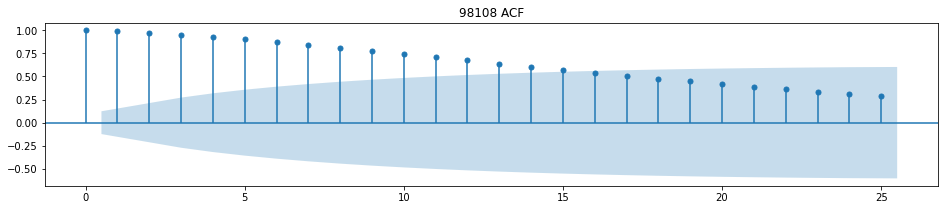

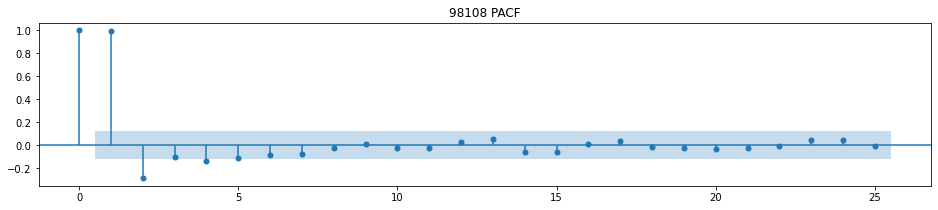

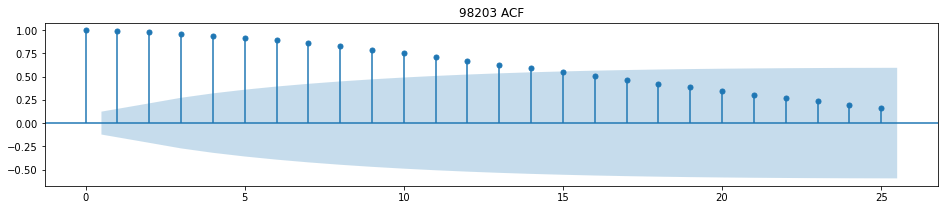

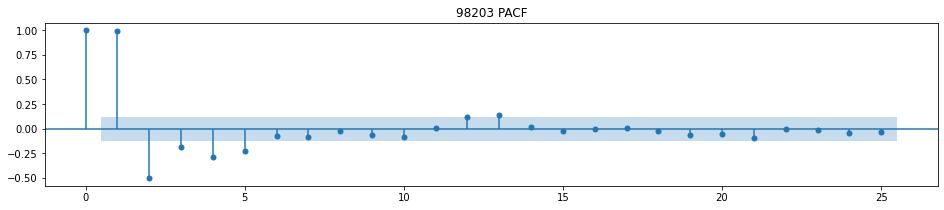

In [126]:
for idx,x in enumerate(final_zips.columns):
    y = final_zips[x].diff(periods=12).dropna()
    fig,ax = plt.subplots(figsize=(16,3))
    plot_acf(y,ax=ax,lags=25)
    plt.title('{} ACF'.format(x))
    fig1,ax1 = plt.subplots(figsize=(16,3))
    plot_pacf(y,ax=ax1,lags=25)
    plt.title('{} PACF'.format(x))

(-2.0, 2.0)

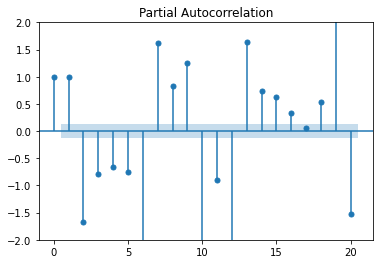

In [113]:
plot_pacf(final_zips[32809].diff(periods=12).dropna(),lags=20)
plt.ylim(-2,2)

In [ ]:
for idx,x in enumerate(final_zips.columns):
    y = final_zips[x].diff(periods=12).dropna()
    fig,ax = plt.subplots(figsize=(16,3))
    plot_pacf(y,ax=ax,lags=25)
    plt.title('{} PACF'.format(x))
    
    

In [ ]:
p_76131 = range(0,13)
d_76131 = range(0,12)
q_76131 = range(0,14)

In [118]:
# for sky lake
p_32809 = range(0,15)
d_32809 = range(0,12)
q_32809 = range(0,14)

pdq = list(itertools.product(p_32809,d_32809,q_32809))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_32809, d_32809, q_32809))]


In [21]:
#for fort worth
p_80215 = range(0,3)
d_80215 = range(0,3)
q_80215 = range(0,13)


pdq = list(itertools.product(p_80215,d_80215,q_80215))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_80215,d_80215,q_80215))]

len(pdq),len(pdqs)

(117, 117)

In [123]:
final_zips['1997':]

,32809,76131,80215,80631,98108,98203
1997-01-01,72500.0,119400.0,160000.0,90500.0,132000.0,138600.0
1997-02-01,72800.0,119800.0,160900.0,90700.0,132800.0,139300.0
1997-03-01,72900.0,120300.0,161500.0,90700.0,133700.0,140000.0
1997-04-01,73100.0,120800.0,162200.0,90700.0,134700.0,140700.0
1997-05-01,73300.0,121300.0,162800.0,90600.0,135600.0,141500.0
...,...,...,...,...,...,...
2017-12-01,171400.0,195800.0,463700.0,217700.0,557400.0,380100.0
2018-01-01,174800.0,197100.0,467300.0,220400.0,564800.0,384300.0
2018-02-01,177800.0,198700.0,471400.0,223600.0,572000.0,388900.0
2018-03-01,180900.0,200600.0,476200.0,226900.0,580000.0,395700.0


In [103]:
final_zips = final_zips.resample('MS').mean()

In [111]:
pd.DataFrame(data=final_zips[80215])

,80215
1996-04-01,152000.0
1996-05-01,152700.0
1996-06-01,153600.0
1996-07-01,154400.0
1996-08-01,155300.0
...,...
2017-12-01,463700.0
2018-01-01,467300.0
2018-02-01,471400.0
2018-03-01,476200.0


In [124]:
final_zips['1997':]['80215']

1997-01-01    160000.0
1997-02-01    160900.0
1997-03-01    161500.0
1997-04-01    162200.0
1997-05-01    162800.0
                ...   
2017-12-01    463700.0
2018-01-01    467300.0
2018-02-01    471400.0
2018-03-01    476200.0
2018-04-01    479000.0
Name: 80215, Length: 256, dtype: float64

In [ ]:
order=(3,2,0), seasonal_order=(3,2,11,12)

In [120]:
mod = sm.tsa.statespace.SARIMAX(pd.DataFrame(data=final_zips['1997':]['80215']),
                                            order=(3,2,0),
                                            seasonal_order=(3,2,11,12),
                                            enforce_invertibility=False,
                                               simple_differencing=False,
                               enforce_stationarity=False)

output = mod.fit()

In [121]:
mod.order, mod.seasonal_order, output.aic

((3, 2, 12), (2, 2, 0, 12), 3441.883363266229)

In [84]:
mod.order, mod.seasonal_order, output.aic

((3, 1, 0), (2, 1, 17, 12), 779.6821773547525)

In [88]:
mod.order, mod.seasonal_order, output.aic

((3, 1, 0), (2, 1, 17, 12), 4520.30462234892)

In [96]:
mod.order, mod.seasonal_order, output.aic

((3, 2, 0), (2, 2, 13, 12), 4033.418026755249)

<function matplotlib.pyplot.show(close=None, block=None)>

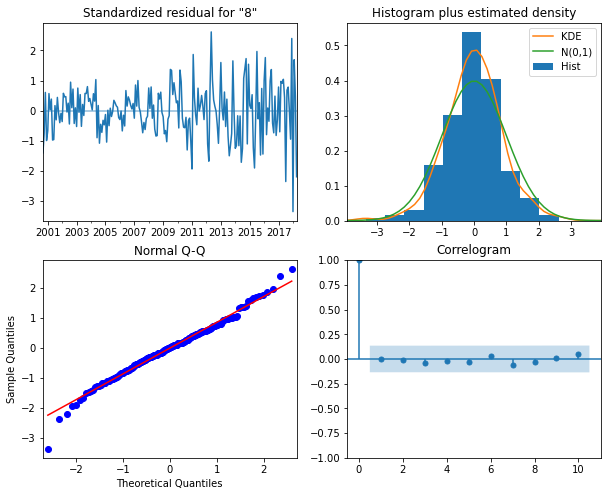

In [122]:
output.plot_diagnostics()
plt.show

In [86]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                  SARIMAX Results                                                                   
====================================================================================================================================================
Dep. Variable:                                                                                        80215   No. Observations:                  265
Model:             SARIMAX(3, 1, 0)x(2, 1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 12)   Log Likelihood                -366.841
Date:                                                                                      Fri, 19 Mar 2021   AIC                            779.682
Time:                                                                                              05:30:12   BIC                            822.236
Sample:                                                                                          04-01-1996   HQIC                           795.695
                                                                                               - 04-01-2018                                         
Covariance Type:                                                                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9722      0.240      4.057      0.000       0.503       1.442
ar.L2         -0.3090      0.361     -0.855      0.392      -1.017       0.399
ar.L3          0.3399      0.326      1.041      0.298      -0.300       0.980
ar.S.L12      -0.4555      0.663     -0.687      0.492      -1.755       0.844
ar.S.L24      -0.6178      0.722     -0.855      0.392      -2.033       0.798
ma.S.L12      -0.5352      1.486     -0.360      0.719      -3.448       2.378
ma.S.L24       0.1834      2.204      0.083      0.934      -4.137       4.504
ma.S.L36      -0.4568      2.130     -0.214      0.830      -4.632       3.719
ma.S.L48       0.0122      3.275      0.004      0.997      -6.406       6.431
ma.S.L60       0.4262      5.981      0.071      0.943     -11.296      12.148
ma.S.L72      -0.1670      6.901     -0.024      0.981     -13.693      13.359
ma.S.L84       0.2206      6.933      0.032      0.975     -13.368      13.809
ma.S.L96      -0.4942      5.717     -0.086      0.931     -11.699      10.711
ma.S.L108      0.0380      4.638      0.008      0.993      -9.053       9.129
ma.S.L120      0.2982      4.548      0.066      0.948      -8.615       9.211
ma.S.L132      0.0253      3.038      0.008      0.993      -5.930       5.980
ma.S.L144      0.1819      3.531      0.052      0.959      -6.738       7.102
ma.S.L156     -0.3532      2.356     -0.150      0.881      -4.970       4.264
ma.S.L168     -0.2540      0.815     -0.312      0.755      -1.850       1.343
ma.S.L180      0.1193      0.968      0.123      0.902      -1.777       2.016
ma.S.L192     -0.0354      0.618     -0.057      0.954      -1.246       1.175
ma.S.L204      0.2286      0.604      0.379      0.705      -0.955       1.412
sigma2      3.562e+05   3.64e+05      0.978      0.328   -3.58e+05    1.07e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.46   Prob(JB):                         0.87
Heteroskedasticity (H):               2.88   Skew:                             0.19
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the

In [ ]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(final_zips[32809],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
        except:
            continue

In [129]:
# for 80631
p_80631 = range(0,5)
d_80631 = range(0,3)
q_80631 = range(0,5)

pdq = list(itertools.product(p_80631,d_80631,q_80631))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_80631,d_80631,q_80631))]
len(pdq)

75

In [130]:
ans_80631 = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(final_zips['80631'],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans_80631.append([comb, combs, output.aic])
        except:
            continue

In [ ]:
ans_df_80631

In [131]:
ans_df_80631 = pd.DataFrame(ans_80631, columns=['pdq', 'pdqs', 'aic'])
ans_df_80631.loc[ans_df_80631['aic'].idxmin()]

pdq         (0, 2, 4)
pdqs    (1, 2, 4, 12)
aic           2768.19
Name: 1079, dtype: object

In [136]:
ans_df_80631.sort_values(by='aic').head(20)

,pdq,pdqs,aic
1079,"(0, 2, 4)","(1, 2, 4, 12)",2768.185360
1064,"(0, 2, 4)","(0, 2, 4, 12)",2768.724745
1004,"(0, 2, 3)","(1, 2, 4, 12)",2781.362102
989,"(0, 2, 3)","(0, 2, 4, 12)",2783.412616
2939,"(2, 1, 4)","(0, 2, 4, 12)",2802.230306
4198,"(3, 2, 0)","(4, 2, 3, 12)",2809.129761
4064,"(3, 1, 4)","(0, 2, 4, 12)",2811.045151
1829,"(1, 1, 4)","(1, 2, 4, 12)",2812.201338
1754,"(1, 1, 3)","(1, 2, 4, 12)",2813.983374
2054,"(1, 2, 2)","(1, 2, 4, 12)",2815.630350


In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p_32809 = range(0,15)
d_32809 = range(0,12)
q_32809 = range(0,14)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]